## Projeto de Ciencia de dados - Previsão de vendas

• DESAFIO: Prever futuras vendas com base em 3 investimentos: Tv, Jornal e Rádio

unidades de medida:
- Investimento: milhar
- Vendas: Milhão

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Extração/Obtenção de Dados
- Passo 2: Ajuste de Dados (Tratamento/Limpeza)
- Passo 3: Análise Exploratória
- Passo 4: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 5: Interpretação de Resultados

In [1]:
import pandas as pd

df = pd.read_csv("advertising.csv")
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
#tratamento de dados
print(df.info()) 

#Não será preciso tratar o dataframe pois ele ja está correto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


### Correlação
- A correlação entre 2 informações está dentro de um intervalo entre 0 e 1

- Caso o valor da correlação esteja próximo de 1, então a correlação entre essas 2 informações é muito forte
- Caso o valor da correlação esteja próximo de 0, então a correlação entre essas 2 informações é muito fraca

- 2 informações que possuem uma correlação muito forte são mais indicadas para o investimento

### Análise Exploratória
- Iremos verificar a Correlação entre cada um dos itens do dataframe

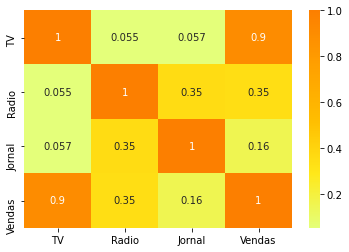

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# a biblioteca pandas permite visualizar a correlação através da função .corr()
# a função cmap="Wistia", da a cor alaranjada ao gráfico 
# annot=True, nos mostra os valores do tipo float (correlação entre 2 informações) dentro do gráfico

# criar o grafico
sns.heatmap(df.corr(), cmap="Wistia", annot=True)

# exibir o grafico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

- X: Quem vou usar para realizar a previsão
- Y: Quem eu vou prever

In [12]:
# Separar os dados em x e y
y = df["Vendas"]
x = df[["TV","Radio","Jornal"]]

# separar os dados em treino e teste
from sklearn.model_selection import train_test_split #divide nossa df em 4 partes x_treino, x_teste, y_treino e y_Teste

x_treino, x_teste, y_treino,y_teste = train_test_split(x,y) #usar nesta mesma ordem

# por padrao a função acima pega 80% da base de dados para treino e os 20% para teste porém tem como escolher esses valores
# usando o parametro text_size=0.x, exemplo: train_test_split(x,y, test_size=0.3, 
# significa que 70% da base de dados é usado para treino e 30% é usado para teste

### Temos um problema de regressão portanto usaremos 2 modelos de IA
- Regressão Linear
- RandomForest (arvore de decisão)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Criar as IAs
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar as IAs
modelo_regressaolinear.fit(x_treino,y_treino)
modelo_arvoredecisao.fit(x_treino,y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [14]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9051542061426173
0.9666169101771191


#### Visualização Gráfica das Previsões

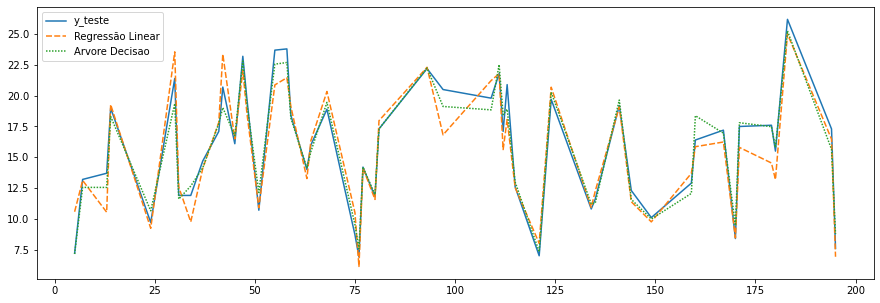

,y_teste,Regressão Linear,Arvore Decisao
64,16.0,16.351369,15.456
194,17.3,16.471501,15.645
55,23.7,20.876170,22.561
183,26.2,25.015288,25.262
31,11.9,12.581540,11.607
111,21.8,21.787455,22.520
63,14.0,13.268366,14.124
77,14.2,14.132609,14.200
48,19.8,18.638582,19.405
81,17.3,17.971820,17.304


In [17]:
df_auxiliar = pd.DataFrame()

df_auxiliar['y_teste'] = y_teste
df_auxiliar['Regressão Linear'] = previsao_regressaolinear
df_auxiliar['Arvore Decisao'] = previsao_arvoredecisao

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_auxiliar)
plt.show()
display(df_auxiliar)

#### Como fazer novas previsões ?
- importar nova tabela com as informações, como não tenho criei um dataFrame
- passa o novo dataFrame para o predict do seu modelo

In [33]:
df_nova_previsao = pd.DataFrame(data=[[23.1,3.8,69.2],[44.5,0,5.1],[170.2,45.9,0]], columns=['TV','Radio','Jornal'])
df_nova_previsao

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [35]:
previsao = modelo_arvoredecisao.predict(df_nova_previsao)

print(previsao)

# cada valor apresentado refere a cada linha do novo dataFrame, ou seja, 
# se nós investirmos os valores da linha 0 teremos como previsão o primeiro valor da resposta -> 7.97 M

[ 7.97   9.018 20.132]
